In [1]:
#初始化
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
#分块读取文件
chunk_size = 1000
dataframes = pd.read_csv('data/汇总数据_修订_天数对齐.csv', chunksize=chunk_size)
df = pd.concat(dataframes)

In [3]:
#识别增产措施
#注：有2w余条数据同时存在两种及以上的增产措施，故针对特定措施增加“有无xx”数据列
df['有无泡排'] = np.where(pd.isnull(df['泡排施工日期']),'无', '有')
df['有无气举'] = np.where(pd.isnull(df['气举类型']),'无', '有')
df['有无增压'] = np.where(pd.isnull(df['是否增压']),'无', '有')

#汇总增产措施
df['增产措施'] = np.nan
df['增产措施'] = np.where(df['有无泡排'] == '有','泡排', df['增产措施'])
df['增产措施'] = np.where(df['有无气举'] == '有','气举', df['增产措施'])
df['增产措施'] = np.where(df['有无增压'] == '有','增压', df['增产措施'])
df['增产措施'] = np.where((df['有无泡排'] == '有') & (df['有无气举'] == '有'),'泡排,气举', df['增产措施'])
df['增产措施'] = np.where((df['有无泡排'] == '有') & (df['有无增压'] == '有'),'泡排,增压', df['增产措施'])
df['增产措施'] = np.where((df['有无气举'] == '有') & (df['有无增压'] == '有'),'气举,增压', df['增产措施'])
df['增产措施'] = np.where((df['有无泡排'] == '有') & (df['有无气举'] == '有') & (df['有无增压'] == '有'),'泡排,气举,增压', df['增产措施'])

#输出csv文件
# df.to_csv('data/汇总数据_修订_天数对齐_措施识别.csv', index=False)

In [4]:
#画图子程序
def plot_data_measure(well_list):
    font = FontProperties(fname=r'SimSun.ttf')
    plt.rcParams['font.sans-serif'] = [font.get_name()]
    plt.rcParams['axes.unicode_minus'] = False
    plt.xlim()  #单个措施识别点在整体图上表现效果不佳，如需观测某特定段的走势，可以调整显示域
    plt.ylim()
    #画整体线图
    for well in well_list:  
        x = df[df['井号'] == well]['生产天数']  
        y = df[df['井号'] == well]['历年累计产气量']  
        plt.plot(x, y, label=well) 
    #画措施点图
    for well in well_list:  
        x = df[(df['井号'] == well) & (df['增产措施'] != 'nan')]['生产天数']  
        y = df[(df['井号'] == well) & (df['增产措施'] != 'nan')]['历年累计产气量']
        plt.scatter(x, y,s = 10)
    plt.xlabel('生产天数')  
    plt.ylabel('历年累计产气量')    
    plt.legend()
    well_str=','.join(well_list)
    plt.savefig('img/' + well_str + '.png', dpi=600)
    plt.show()

In [6]:
df.井号

0         威202H1-1
1         威202H1-1
2         威202H1-1
3         威202H1-1
4         威202H1-1
            ...   
372385        威209
372386        威209
372387        威209
372388        威209
372389        威209
Name: 井号, Length: 372390, dtype: object

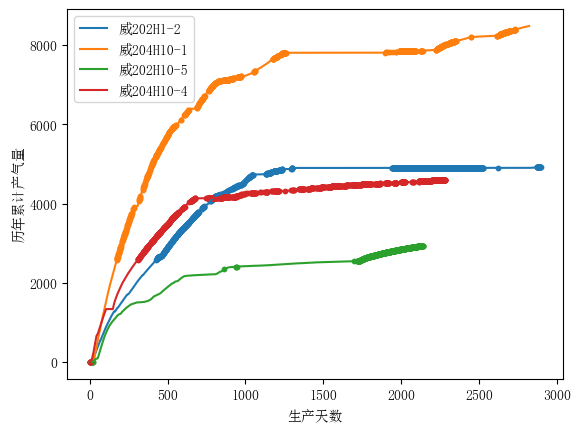

In [11]:
#输入需要绘制的井号至列表内
well_list_input=['威202H1-2','威204H10-1','威202H10-5','威204H10-4']
plot_data_measure(well_list_input)